In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
import nltk
from nltk.book import*

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [29]:
df = pd.read_csv('NNN.csv', encoding='ISO-8859-1')

In [30]:
df.head()

,Date received,Text
0,3/12/2014,NaN
1,10/1/2016,I have outdated information on my credit repor...
2,10/17/2016,I purchased a new car on XXXX XXXX. The car de...
3,6/8/2014,NaN
4,9/13/2014,NaN


In [31]:
df = df.dropna()

In [32]:
df.head()

,Date received,Text
1,10/1/2016,I have outdated information on my credit repor...
2,10/17/2016,I purchased a new car on XXXX XXXX. The car de...
7,6/15/2015,An account on my credit report has a mistaken ...
12,2/3/2016,This company refuses to provide me verificatio...
16,2/17/2016,This complaint is in regards to Square Two Fin...


In [34]:
dff = df[10:60]

In [4]:
import seaborn as sns

In [5]:
from nltk.stem.porter import PorterStemmer
def rm_pn(doc):
    tokens = nltk.word_tokenize(doc)
    tokens = [w.lower() for w in tokens]
    words = [word for word in tokens if word.isalpha()]
        #filter out stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # removing adjective and adverb
    text18 = nltk.pos_tag(words)
    words = [s[0] for s in text18 if not( s[1]=='JJ' or s[1] =='RB' )]
    #stemming the tokens
    porter = PorterStemmer()
    normalized = []
    for word in words:
        t = porter.stem(word)
        normalized.append(t)
    normalized = " ".join(normalized)
    return normalized

In [6]:
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings

In [35]:
text_clean = [rm_pn(doc) for doc in tqdm(dff['Text'])]
dff['reviews'] = text_clean
dff.head()


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.71it/s]


,Date received,Text,reviews
43,2/18/2017,"Without provocation, I received notice that my...",without provoc receiv credit line decreas cred...
49,7/16/2015,I am writing to request your assistance in loo...,write request assist look practic collect appe...
61,4/11/2016,I am disputing the inaccurate information the ...,disput inform credit report submit report chex...
64,2/3/2017,Checked my credit report after filing complain...,check credit report file complaint cfpb xxxx g...
69,6/30/2016,Need to move into a XXXX facility. Can no long...,need move xxxx facil pay morthag would like mo...


In [36]:
dff['reviews']

43     without provoc receiv credit line decreas cred...
49     write request assist look practic collect appe...
61     disput inform credit report submit report chex...
64     check credit report file complaint cfpb xxxx g...
69     need move xxxx facil pay morthag would like mo...
80     attempt xxxx xxxx account xxxx xxxx misinform ...
83     allow credit inquiri without permiss done xxxx...
85     fha loan us bank paid xxxx xxxx pay loan xxxx ...
90     toll would credit score end six custom support...
95     went year request home loan modif bank america...
98     sign express xxxx card xxxx point bonu offer m...
99     credit inquiri credit report must anoth person...
103    report address mine disput inform occas succes...
107    ident stolen file polic report affidavit etc c...
118    portfolio servic intimid find balanc miss paym...
124    document show us bank would charg item fee ove...
136    year servic issu coinbas account reason refus ...
152    drop incom base repay pl

In [37]:
dff[(dff['reviews'].apply(lambda x: x.strip()) == '')].shape

(0, 3)

In [10]:
from helper_scripts import lda
import os
import pickle
import re
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [11]:
import plotly.io as pio
pio.renderers.default = 'iframe+colab+notebook'

In [38]:
lda_model_reviews = lda.LDA(dff['reviews'])

In [25]:
it = iter(lda_model_reviews)
it = next(it)
it.insert(0, ('word', 'frequency'))
it[:10]

[('word', 'frequency'),
 ('account', 1),
 ('ahmedabad', 1),
 ('amount', 1),
 ('annoy', 1),
 ('anoth', 1),
 ('answer', 2),
 ('anyth', 1),
 ('app', 1),
 ('ask', 1)]

In [39]:
lda_model = lda.LDA(dff['reviews'])
lda_model.filter_extremes(keep_n=10000, no_below=10,  no_above = 0.3)
# sanity check on dictionary size
len(lda_model.dictionary)

26


tuning:   0%|                                                                                   | 0/39 [00:00<?, ?it/s]
tuning:   0%| | 0/39 [00:05<?, ?it/s, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symmetric', 'b
tuning:   3%| | 1/39 [00:05<03:47,  5.98s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symmet
tuning:   3%| | 1/39 [00:11<03:47,  5.98s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symmet
tuning:   5%| | 2/39 [00:11<03:36,  5.84s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symmet
tuning:   5%| | 2/39 [00:17<03:36,  5.84s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symmet
tuning:   8%| | 3/39 [00:17<03:27,  5.77s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symmet
tuning:   8%| | 3/39 [00:22<03:27,  5.77s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symmet
tuning:  10%| | 4/39 [00:22<03:18,  5.6

tuning:  85%|▊| 33/39 [03:37<00:42,  7.13s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symme
tuning:  85%|▊| 33/39 [03:44<00:42,  7.13s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symme
tuning:  87%|▊| 34/39 [03:44<00:35,  7.12s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symme
tuning:  87%|▊| 34/39 [03:51<00:35,  7.12s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symme
tuning:  90%|▉| 35/39 [03:51<00:28,  7.19s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symme
tuning:  90%|▉| 35/39 [03:59<00:28,  7.19s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symme
tuning:  92%|▉| 36/39 [03:59<00:21,  7.21s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symme
tuning:  92%|▉| 36/39 [04:06<00:21,  7.21s/it, max_coherence_score=0.188, best_params={'num_topics': 2, 'alpha': 'symme
tuning:  95%|▉| 37/39 [04:06<00:14,  7.2

Finished hyperparameter tuning, model updated!


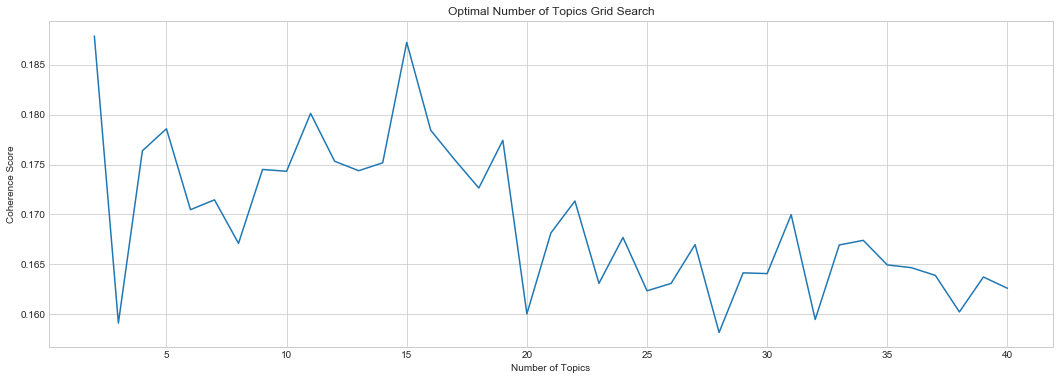

In [40]:
lda_model.find_best_num_topics()

In [41]:
lda_model.fit(**lda_model.best_params_, predict_training_samples=True)
lda_model.print_output()

Topic: 0	Coherence Score: 0.2134
Words: 0.068*"compani" + 0.065*"letter" + 0.064*"pay" + 0.061*"contact" + 0.056*"told" + 0.053*"servic" + 0.051*"remov" + 0.048*"call" + 0.046*"say" + 0.043*"money"

########

Topic: 1	Coherence Score: 0.1624
Words: 0.099*"mortgag" + 0.088*"compani" + 0.066*"call" + 0.063*"balanc" + 0.057*"could" + 0.050*"home" + 0.049*"amount" + 0.047*"told" + 0.046*"make" + 0.046*"letter"

########

Perplexity Score: -3.3689 
Overall Coherence Score: 0.1879


In [42]:
lda_model.visualize_topics_

In [17]:
topic_names = ["Feedback", #
    "Hill Station needs complaint",
    "Beach destination best place", 
               "Luxury trip Dubai honeymoon best trip",
               "Thailand malaysia adventure Experience",
               "Holiday summer holiday trip",
               "Travel bollywood",
               "Festive world Party",
               "Hotel flight travel booking gateway",
               "Weekend trip experience"#
]
topics = '''
Topic: 0	Coherence Score: 0.4349
Words: 0.037*"rt" + 0.036*"thank" + 0.033*"explor" + 0.032*"makemytripcar" + 0.032*"makemytrip" + 0.031*"amp" + 0.028*"travel" + 0.025*"food" + 0.023*"issu" + 0.022*"show"

########

Topic: 1	Coherence Score: 0.5831
Words: 0.059*"know" + 0.033*"need" + 0.029*"across" + 0.027*"countri" + 0.027*"like" + 0.026*"celebr" + 0.026*"cultur" + 0.025*"wine" + 0.024*"hill" + 0.024*"kashmir"

########

Topic: 2	Coherence Score: 0.6014
Words: 0.148*"thing" + 0.064*"place" + 0.062*"india" + 0.035*"best" + 0.033*"beach" + 0.027*"goa" + 0.026*"visit" + 0.026*"rs" + 0.025*"love" + 0.021*"australia"

########

Topic: 3	Coherence Score: 0.4592
Words: 0.103*"day" + 0.057*"way" + 0.046*"best" + 0.040*"world" + 0.039*"hotel" + 0.033*"highway" + 0.028*"trip" + 0.021*"dubai" + 0.021*"luxuri" + 0.020*"tale"

########

Topic: 4	Coherence Score: 0.5144
Words: 0.060*"trip" + 0.057*"travel" + 0.053*"experi" + 0.037*"plan" + 0.027*"thailand" + 0.026*"island" + 0.024*"holiday" + 0.022*"make" + 0.020*"road" + 0.020*"style"

########

Topic: 5	Coherence Score: 0.2839
Words: 0.073*"holiday" + 0.060*"visit" + 0.047*"mumbai" + 0.045*"reason" + 0.029*"summer" + 0.026*"place" + 0.024*"india" + 0.024*"travel" + 0.023*"miss" + 0.023*"time"

########

Topic: 6	Coherence Score: 0.4514
Words: 0.169*"travel" + 0.059*"celebr" + 0.030*"bollywood" + 0.027*"thank" + 0.027*"get" + 0.023*"rt" + 0.022*"flight" + 0.020*"sri" + 0.019*"makemytrip" + 0.019*"makemytripcar"

########

Topic: 7	Coherence Score: 0.5512
Words: 0.171*"festiv" + 0.072*"world" + 0.036*"around" + 0.030*"guid" + 0.027*"experi" + 0.020*"adventur" + 0.020*"music" + 0.020*"parti" + 0.019*"day" + 0.018*"food"

########

Topic: 8	Coherence Score: 0.3411
Words: 0.088*"hotel" + 0.041*"book" + 0.041*"getaway" + 0.040*"weekend" + 0.039*"delhi" + 0.035*"destin" + 0.032*"visit" + 0.031*"stay" + 0.027*"place" + 0.026*"vacat"

########

Topic: 9	Coherence Score: 0.6402
Words: 0.068*"thank" + 0.068*"rt" + 0.068*"code" + 0.066*"makemytripcar" + 0.039*"weekend" + 0.036*"mmt" + 0.027*"getaway" + 0.026*"amp" + 0.026*"get" + 0.024*"effort"
'''
topics = re.findall('(Topic: \d|Words:.*)', topics)

assert len(topics) / 2 == len(topic_names), "Number of given names doesn't match number of topics!"

topics = {k:', '.join(re.findall('"\w+"', topics[i + 1])) for k, i in zip(topic_names, range(0, len(topics), 2))}

for k, v in topics.items():
    print('topic:', k)
    print('words:', v, end='\n*****\n\n')

topic: Feedback
words: "rt", "thank", "explor", "makemytripcar", "makemytrip", "amp", "travel", "food", "issu", "show"
*****

topic: Hill Station needs complaint
words: "know", "need", "across", "countri", "like", "celebr", "cultur", "wine", "hill", "kashmir"
*****

topic: Beach destination best place
words: "thing", "place", "india", "best", "beach", "goa", "visit", "rs", "love", "australia"
*****

topic: Luxury trip Dubai honeymoon best trip
words: "day", "way", "best", "world", "hotel", "highway", "trip", "dubai", "luxuri", "tale"
*****

topic: Thailand malaysia adventure Experience
words: "trip", "travel", "experi", "plan", "thailand", "island", "holiday", "make", "road", "style"
*****

topic: Holiday summer holiday trip
words: "holiday", "visit", "mumbai", "reason", "summer", "place", "india", "travel", "miss", "time"
*****

topic: Travel bollywood
words: "travel", "celebr", "bollywood", "thank", "get", "rt", "flight", "sri", "makemytrip", "makemytripcar"
*****

topic: Festive wor

In [18]:
list(topics.keys())

['Feedback',
 'Hill Station needs complaint',
 'Beach destination best place',
 'Luxury trip Dubai honeymoon best trip',
 'Thailand malaysia adventure Experience',
 'Holiday summer holiday trip',
 'Travel bollywood',
 'Festive world Party',
 'Hotel flight travel booking gateway',
 'Weekend trip experience']

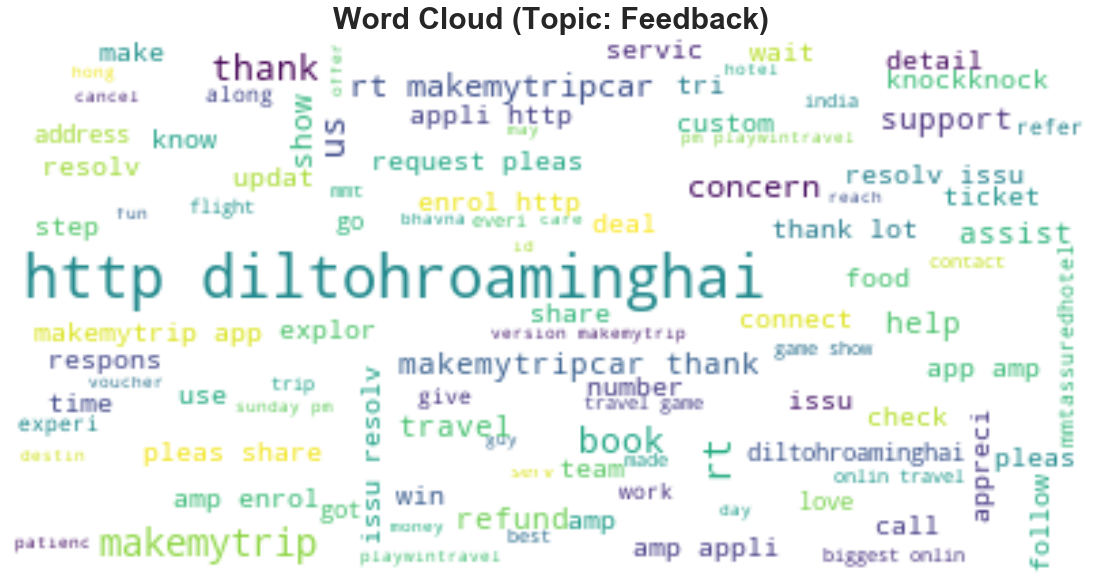

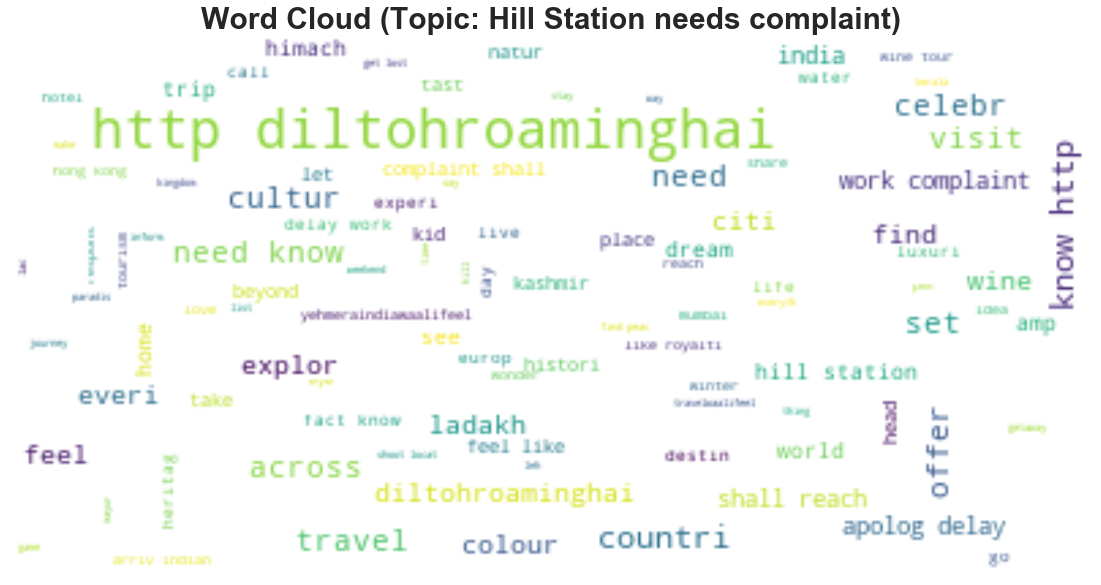

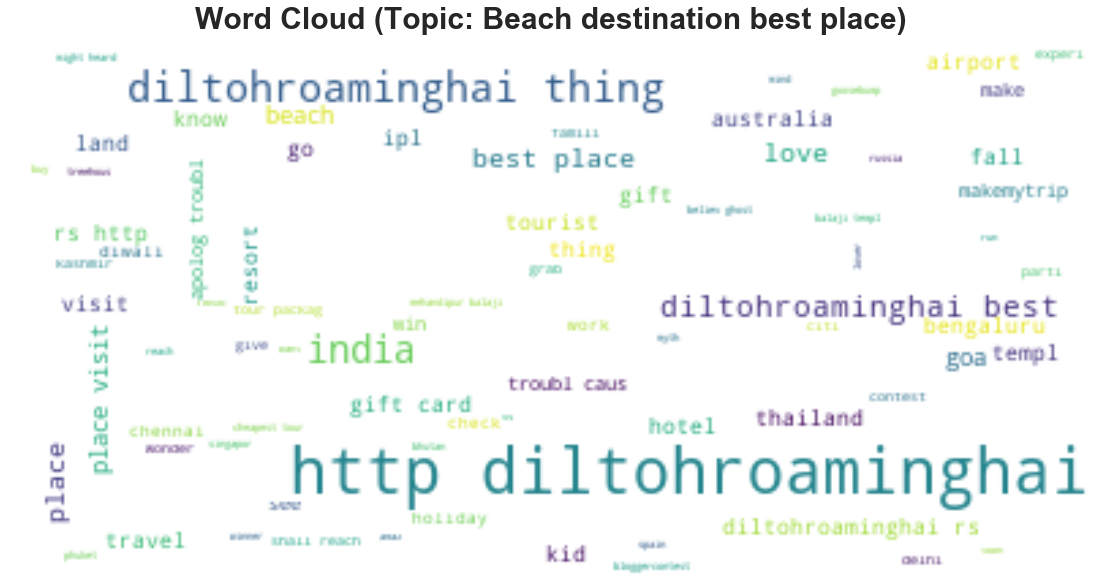

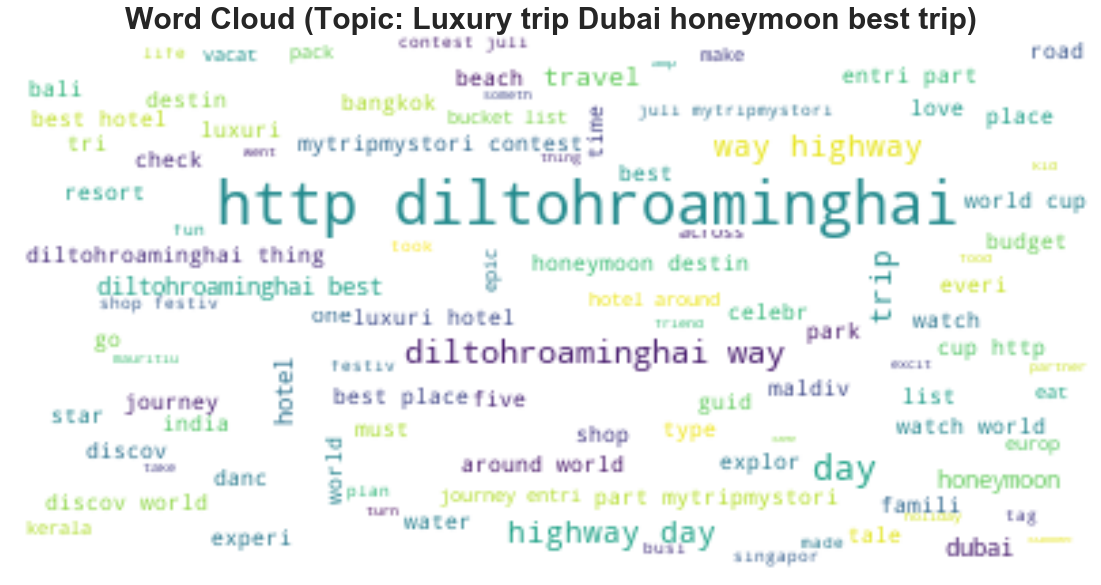

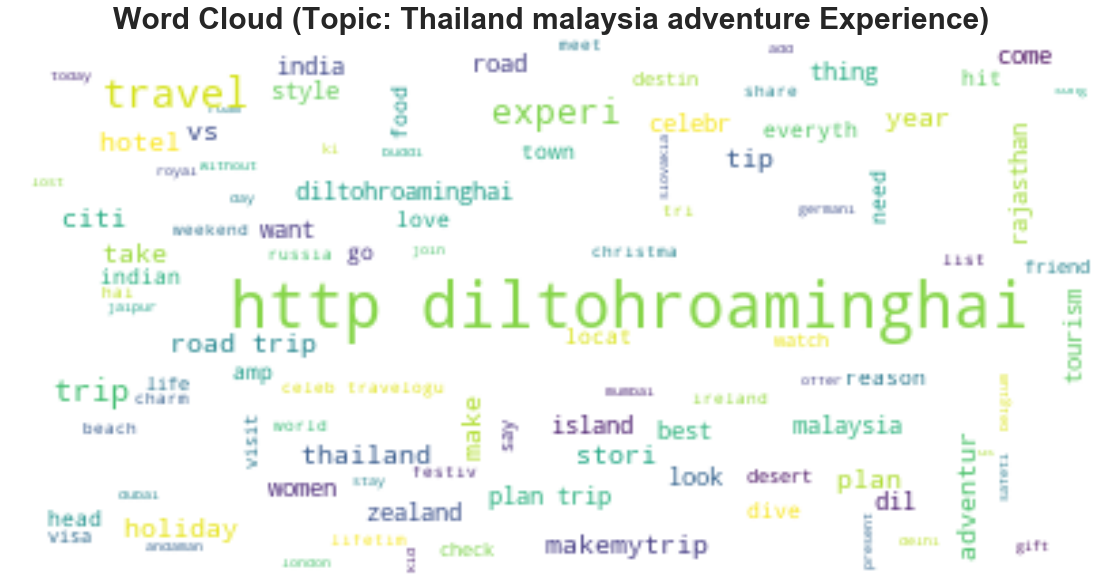

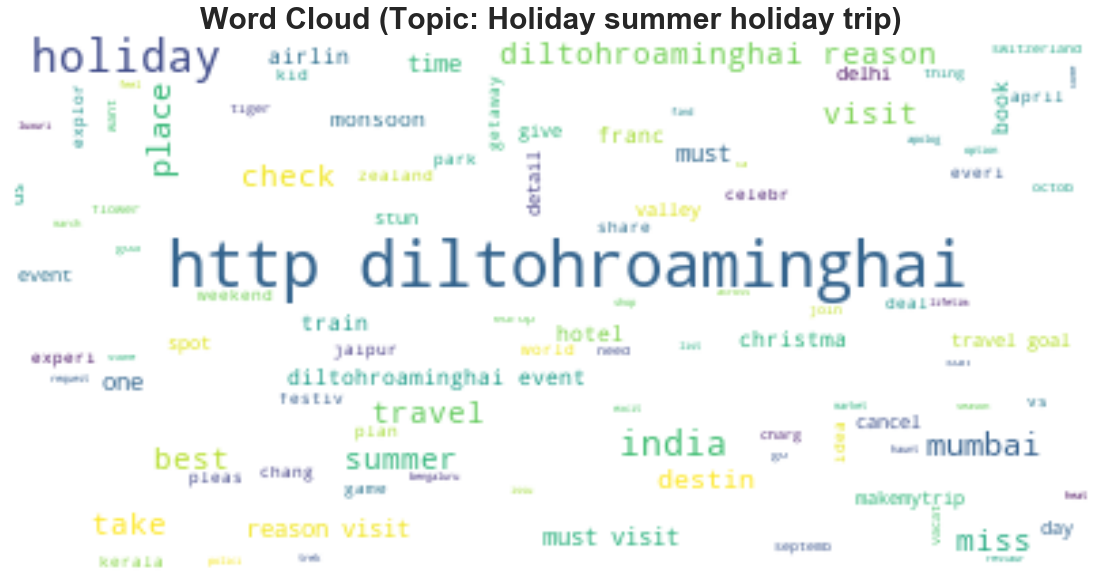

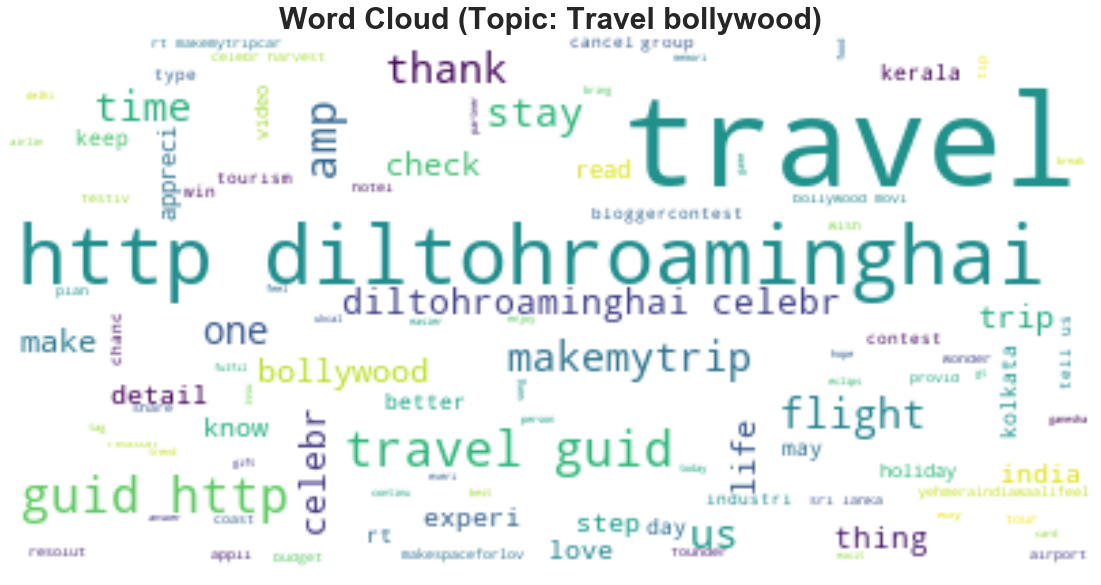

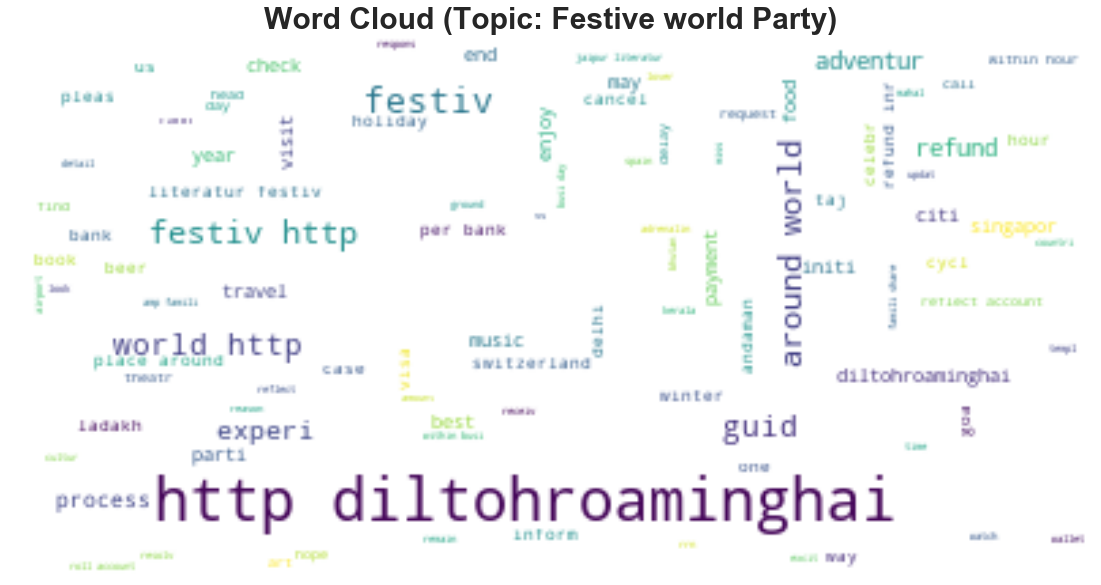

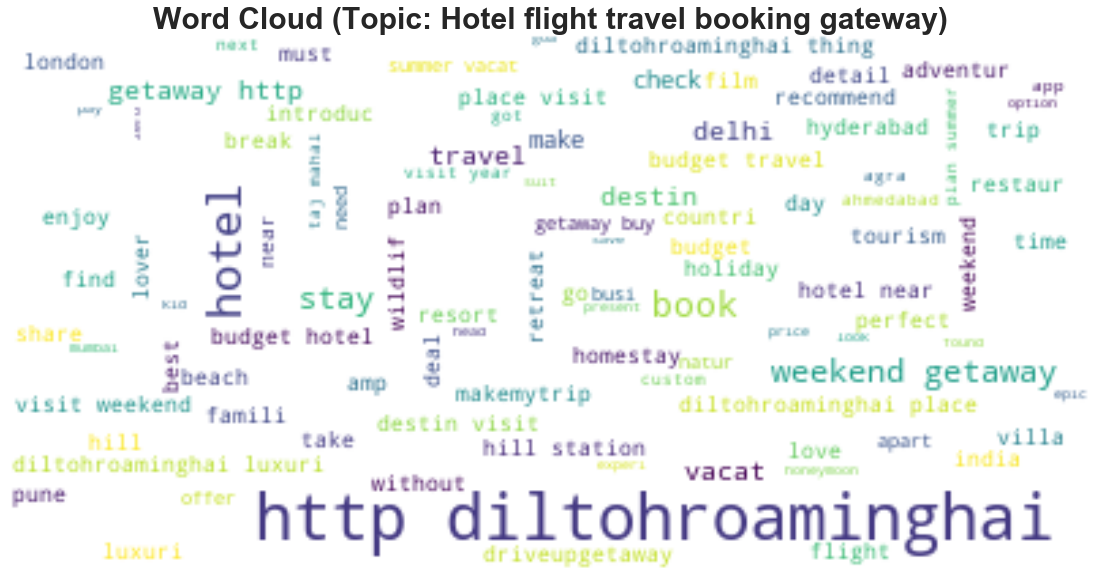

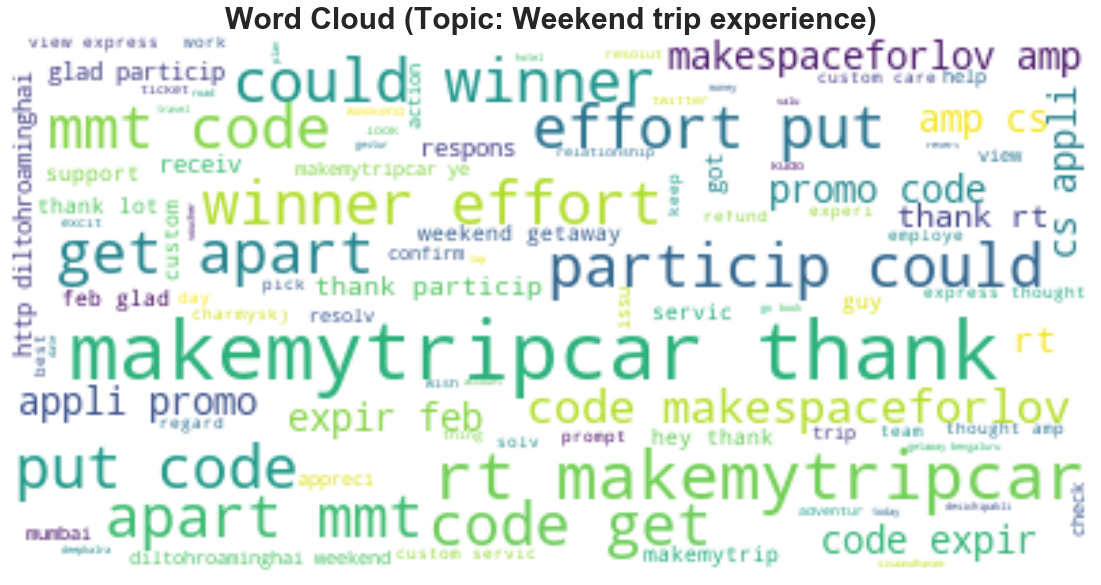

In [19]:
lda_model.generate_topic_word_cloud(topic_names=list(topics.keys()))

In [20]:
df

,Tweet Id,Text,Name,Screen Name,UTC,reviews
0,1357572498766712832,Celebrating the Heroes amongst us who toiled r...,MakeMyTrip,makemytrip,2021-02-05T06:11:20.000Z,celebr hero amongst us toil ensur make trip ge...
1,1354143630022250496,"This #RepublicDay, lets pledge to explore Ind...",MakeMyTrip,makemytrip,2021-01-26T19:06:14.000Z,republicday pledg explor discov gem myindia http
2,1352513788285575169,Travel has been one of the worst business caus...,MakeMyTrip,makemytrip,2021-01-22T07:09:50.000Z,travel one worst busi causal industri claw los...
3,1349959611445493763,We are delighted to be part of Startup India I...,MakeMyTrip,makemytrip,2021-01-15T06:00:27.000Z,part startup india summit share space innov po...
4,1338502418108096513,Even Google took a break. #DriveUpGetAway\n#Go...,MakeMyTrip,makemytrip,2020-12-14T15:13:39.000Z,googl took break googledown
...,...,...,...,...,...,...
3179,848883185609920512,End Those Baggage Snags at the Airport - Now! ...,MakeMyTrip,makemytrip,2017-04-03T13:01:37.000Z,end baggag airport http diltohroaminghai
3180,848883178794176512,Mount Abu Winter Festival: A Great Way To Welc...,MakeMyTrip,makemytrip,2017-04-03T13:01:35.000Z,mount abu winter festiv way year http diltohro...
3181,848883041040646144,Far from the Madding Crowd this New Year https...,MakeMyTrip,makemytrip,2017-04-03T13:01:03.000Z,mad year http diltohroaminghai
3182,848883034354966528,Planning that Big Fat Royal Wedding in Rajasth...,MakeMyTrip,makemytrip,2017-04-03T13:01:01.000Z,plan fat royal wed rajasthan http diltohroamin...
